# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.filters import threshold_otsu
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


'\n1) Erosion / Dilation:\n    - Load "coins.jpg" from the img folder\n    - Convert the image to binary\n    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image\n    - Use Skimage\'s "binary_erosion" & "binary_dilation" & show the results\n'

# EROSION

In [13]:
def manually_erosion(img,structural_element):
    err = np.copy(binary)

    for i in range(err.shape[0]-structural_element.shape[0]+1):
        for j in range(err.shape[1]-structural_element.shape[1]+1):
            #accessing part of matrix to be tested
            temp = binary[i:(structural_element.shape[0]+i), j:(structural_element.shape[1]+j)]
            #assume pivot will be on center Struct. Elem/2 in x and y axes
            #check if filter fits or not
            err[(structural_element.shape[0]//2)+i][(structural_element.shape[1]//2)+j]= np.array_equal(temp,structural_element)
    return err        
    

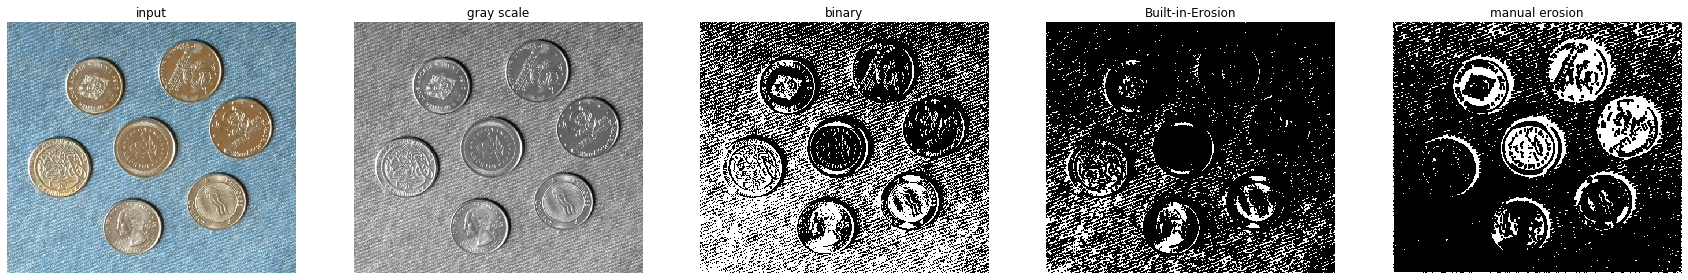

In [20]:
img = io.imread('img/coins.jpg')
gray = rgb2gray(img)
threshold = threshold_otsu(gray)
binary = gray > threshold
structural_element = np.array([[0,0,0]
                             ,[0,0,0]
                             ,[0,0,0]])

err = manually_erosion(binary,structural_element)
built_in_err = binary_erosion(binary)#,structural_element)
show_images([img,gray,binary,built_in_err,err],["input","gray scale","binary","Built-in-Erosion","manual erosion"])

# DILATION

In [21]:
def manually_dilation(binary,structural_element):

    dil = np.copy(binary)


    for i in range(dil.shape[0]-structural_element.shape[0]+1):
        for j in range(dil.shape[1]-structural_element.shape[1]+1):
            #accessing part of matrix to be tested
            temp = binary[i:(structural_element.shape[0]+i), j:(structural_element.shape[1]+j)]
            #assume pivot will be on center Struct. Elem/2 in x and y axes
            #check if filter fits or not

            dil[(structural_element.shape[0]//2)+i][(structural_element.shape[1]//2)+j]= np.any(temp==structural_element) 
    return dil 

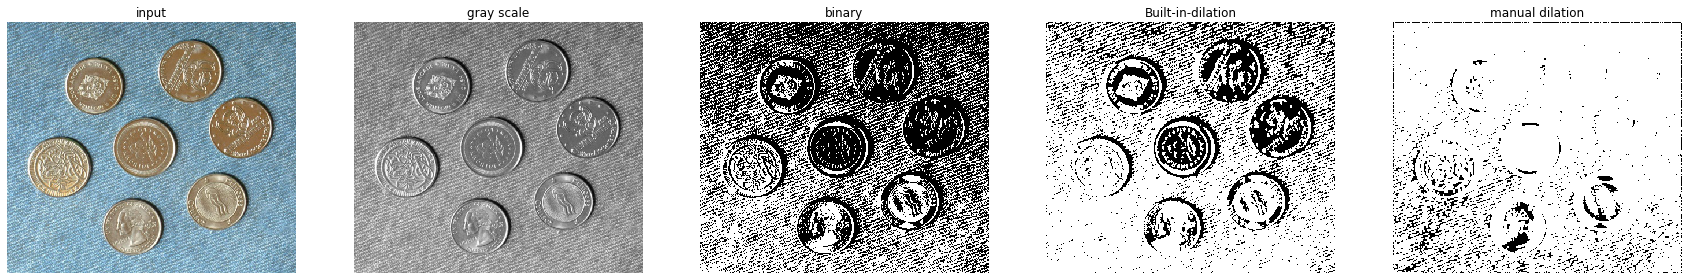

In [22]:
dil = manually_dilation(binary,structural_element)
built_in_dil = binary_dilation(binary)#,structural_element)
show_images([img,gray,binary,built_in_dil,dil],["input","gray scale","binary","Built-in-dilation","manual dilation"])

In [31]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

img = io.imread('img/card.jpg')
gray = rgb2gray(img)
threshold = threshold_otsu(gray)
binary = gray > threshold

structural_element = np.array([[0,0,0]
                             ,[0,0,0]
                             ,[0,0,0]])

closing = manually_erosion( manually_dilation(binary,structural_element) ,structural_element)
bounding_boxes=find_contours(closing,0.8)

show_images([img,gray,binary,closing],["input","gray scale","binary","closing"])



#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    img_with_boxes[rr, cc] = 1 #set color white

TypeError: list indices must be integers or slices, not tuple

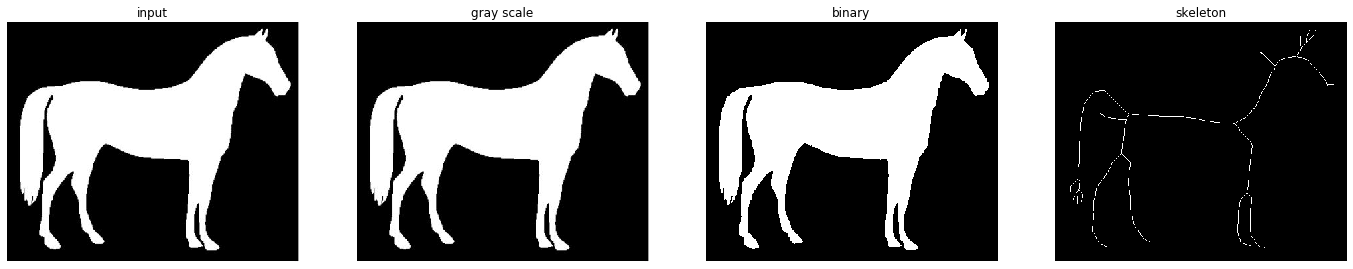

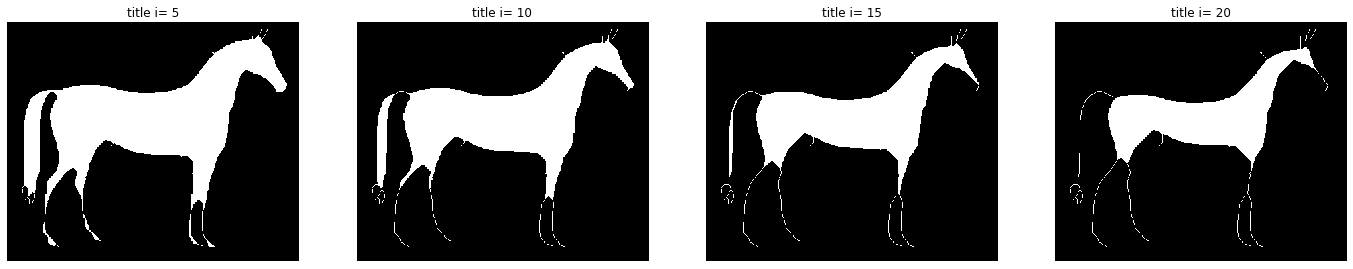

In [57]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = io.imread('img/horse.jpg')
gray = rgb2gray(img)
binary = gray > 0.9
skelet = skeletonize(binary)
show_images([img,gray,binary,skelet],["input","gray scale","binary","skeleton"])
thinning = []
titles = []
for i in [5,10,15,20]:
    thinning.append(thin(binary,max_iter=i))
    titles.append('title i= '+str(i))
show_images(thinning,titles)